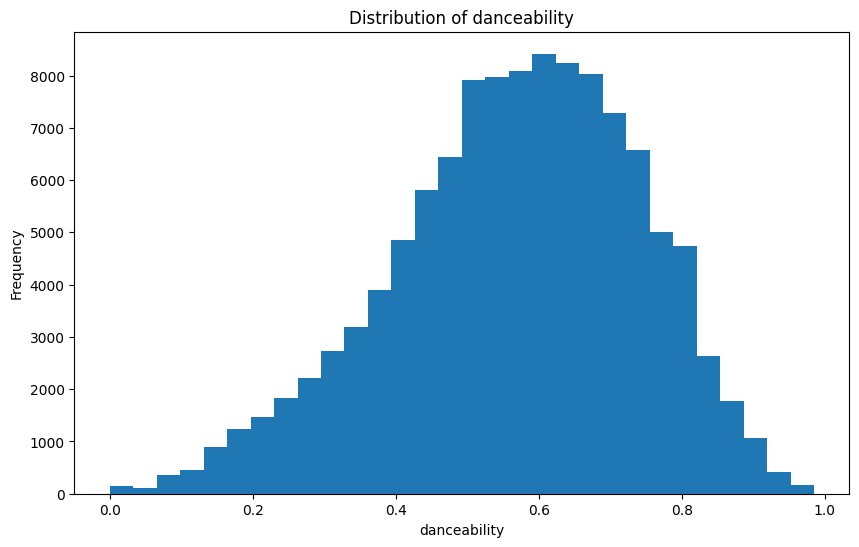

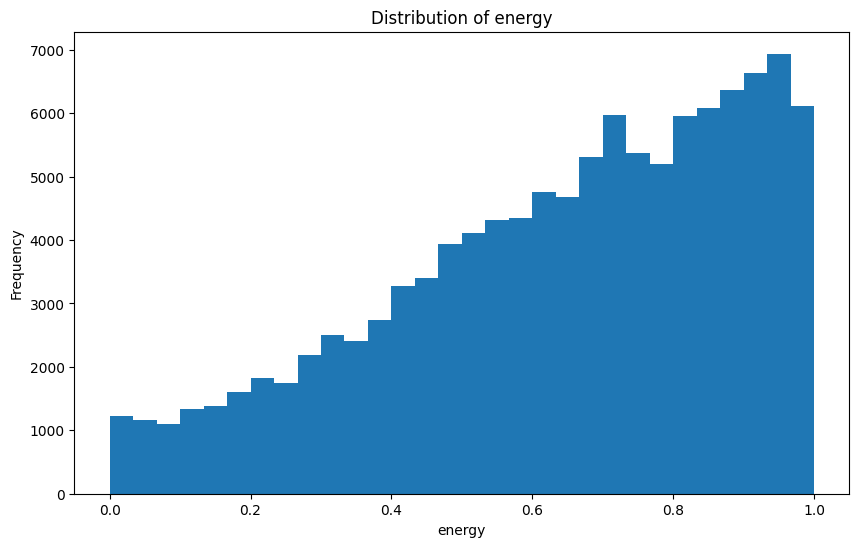

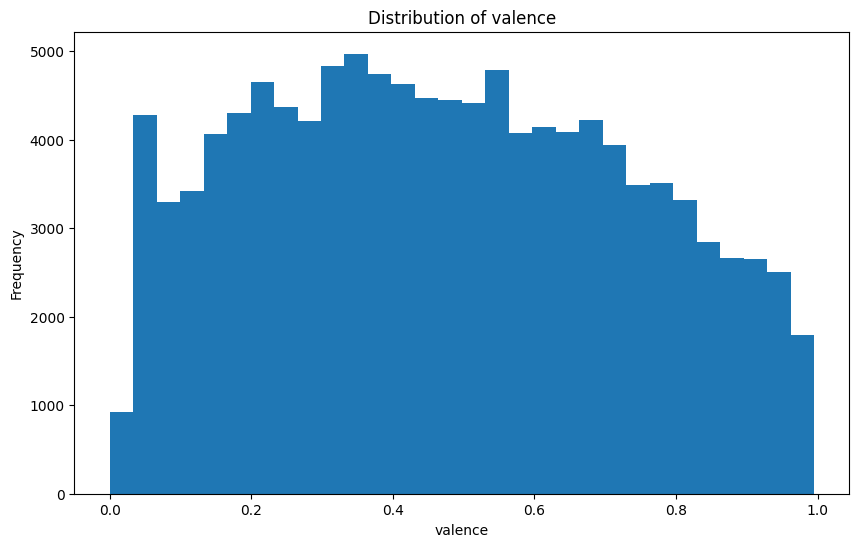

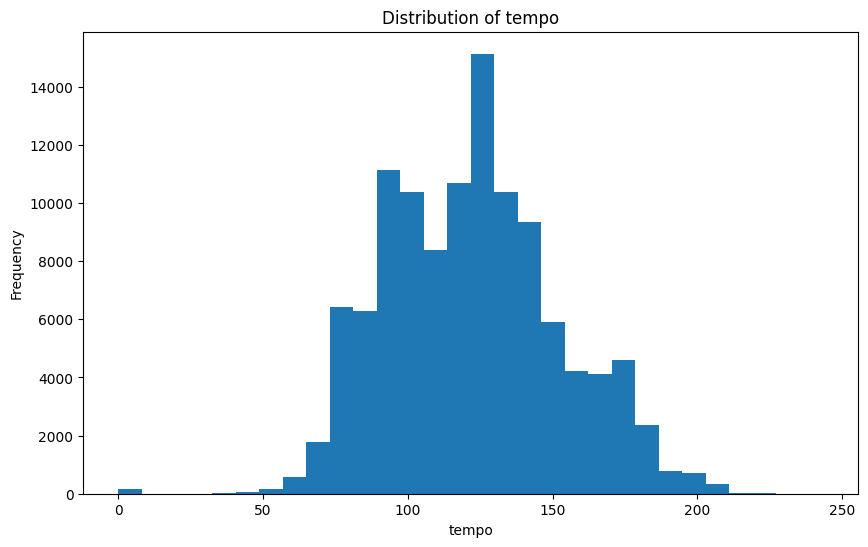

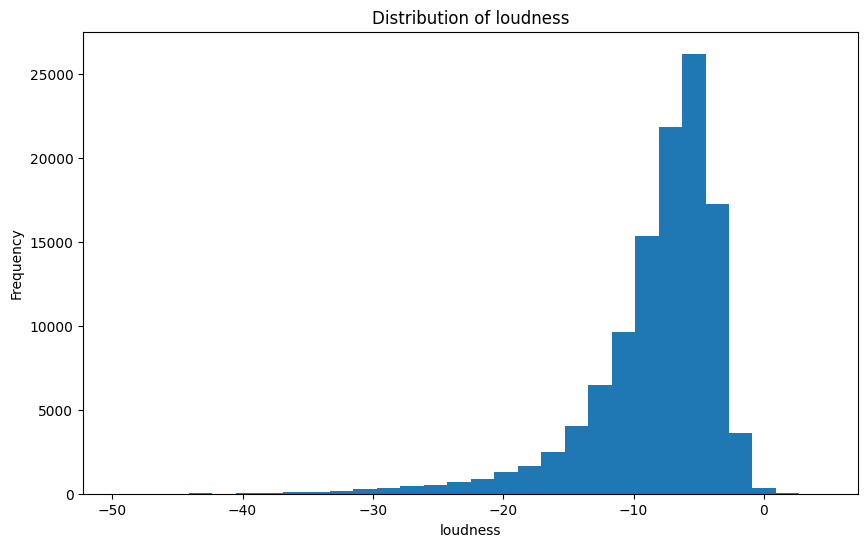

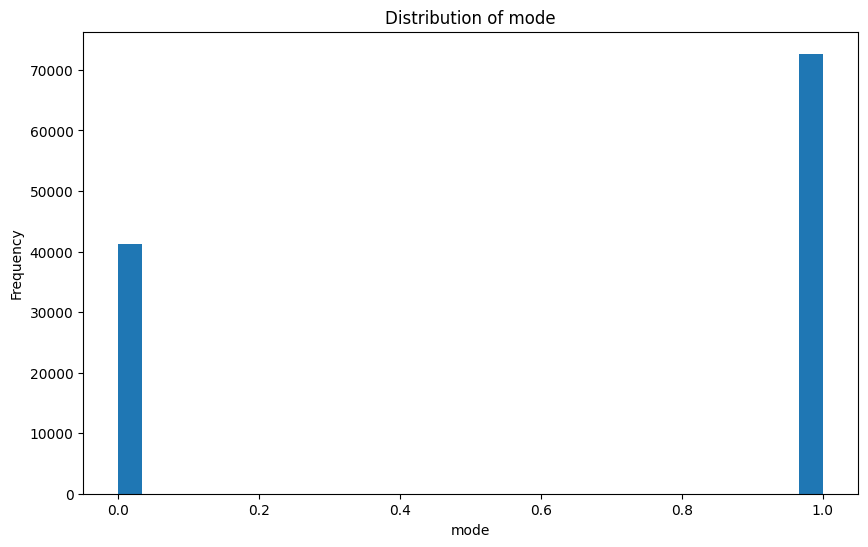

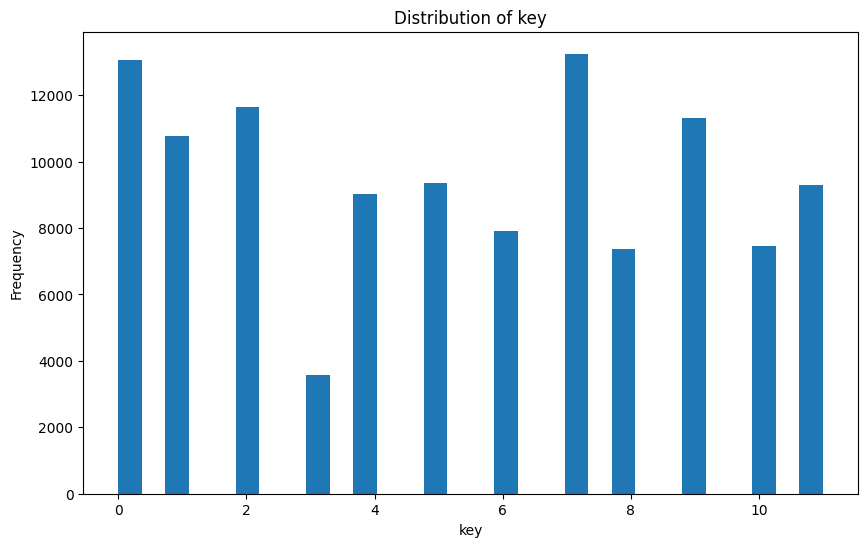

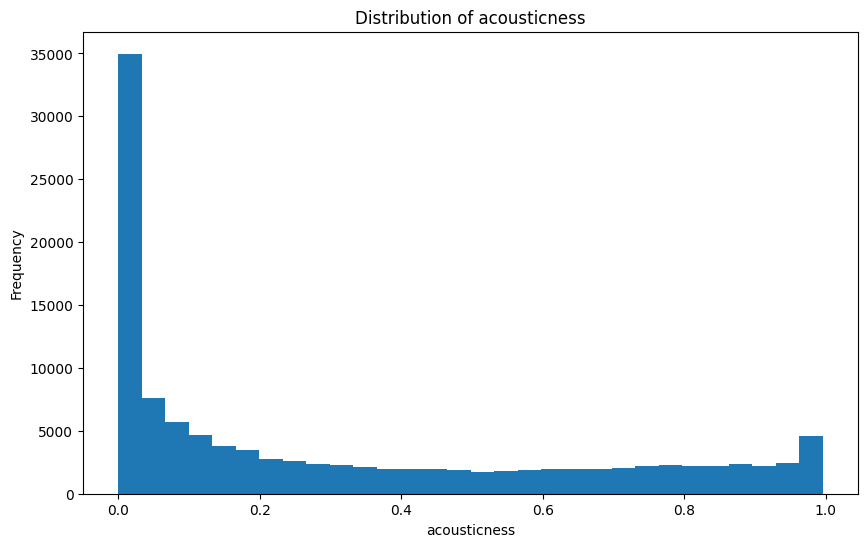

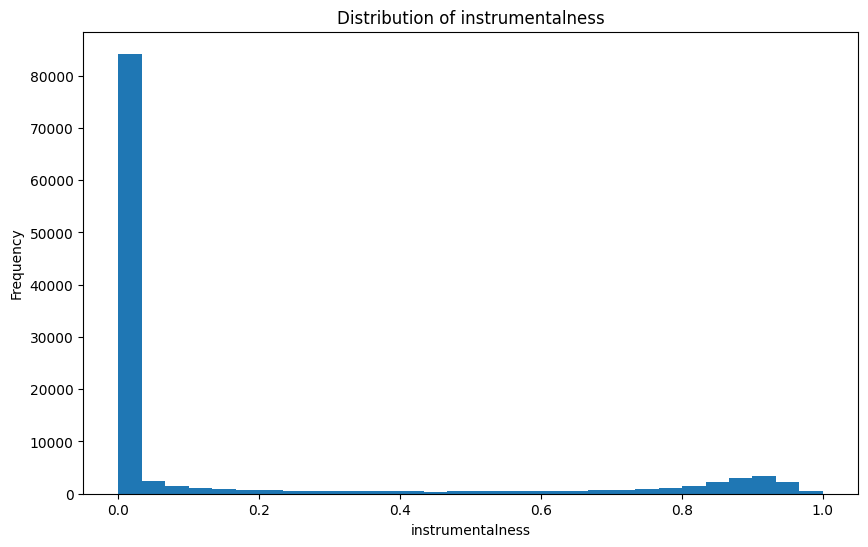

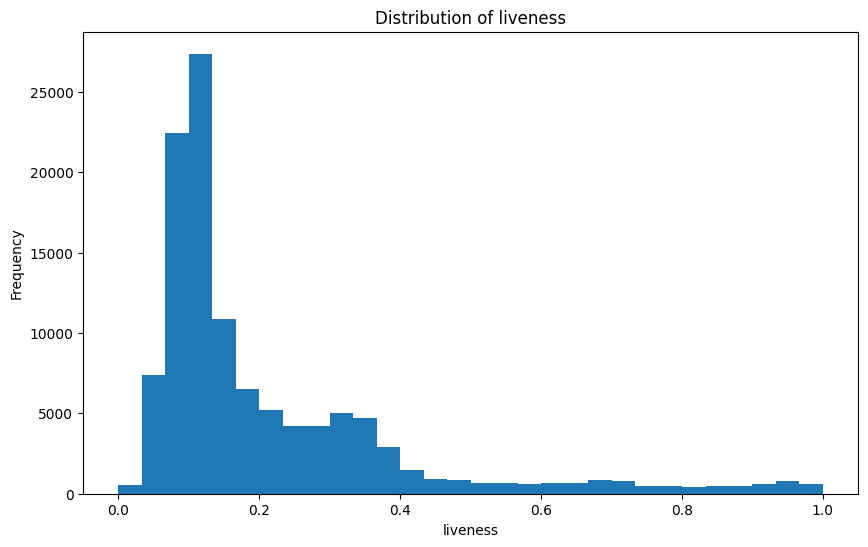

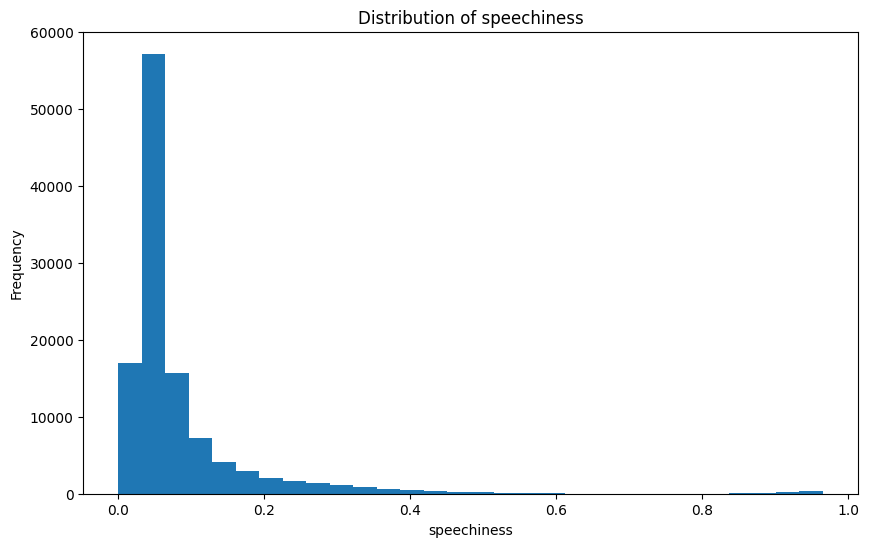

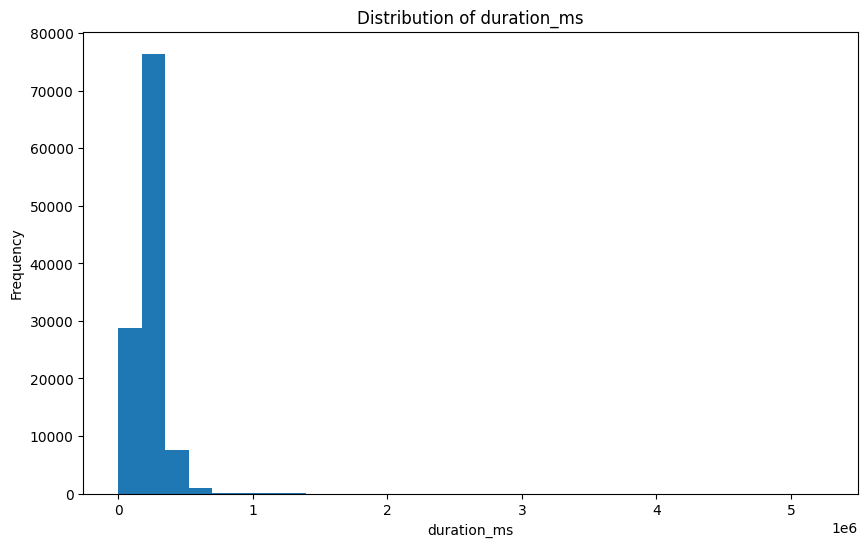

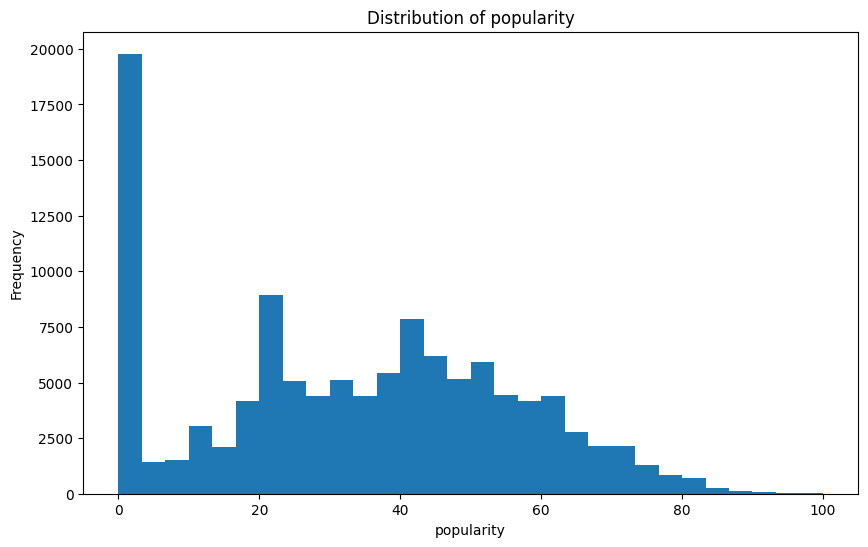

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')

# List of song characteristics
song_characteristics = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'popularity']

# For each characteristic, plot a histogram
for characteristic in song_characteristics:
    plt.figure(figsize=(10,6))
    plt.hist(df[characteristic].dropna(), bins=30)  # Exclude any missing data
    plt.title('Distribution of '+ characteristic)
    plt.xlabel(characteristic)
    plt.ylabel('Frequency')
    plt.show()


In [3]:
#Are there clusters of songs that are similar in terms of their characteristics?

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dataset.csv')

song_features = df[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'popularity']]

# Normalize the features
scaler = StandardScaler()
song_features = scaler.fit_transform(song_features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=0)  # to generalize the data into 10 clusters of songs, can be changed
df['cluster'] = kmeans.fit_predict(song_features)

# Print the DataFrame with the new 'cluster' column
print(df)


C:\Users\evard\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


            id                track_id                 artists  \
0            0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1            1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2            2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3            3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4            4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...        ...                     ...                     ...   
113995  113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                       

In [2]:
#Do specific artists prefer to make songs with certain characteristics?

import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Group by artist name
grouped = df.groupby('artists')

# Get mean of song characteristics for each artist
mean_characteristics = grouped[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'popularity']].mean()

# Print the means of the characteristics for each artist
print(mean_characteristics)



                                                    danceability    energy  \
artists                                                                      
!nvite                                                    0.8205  0.519000   
"Puppy Dog Pals" Cast                                     0.7050  0.856000   
"Weird Al" Yankovic                                       0.6574  0.575000   
#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs        0.5800  0.494000   
$affie                                                    0.7440  0.178000   
...                                                          ...       ...   
黃仲崑                                                       0.5640  0.533333   
黃妃                                                        0.5500  0.649500   
黃小琥                                                       0.3340  0.431000   
黃敏華                                                       0.5490  0.478000   
龍藏Ryuzo                                                   0.4975